In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [36]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')].sort('year')
g = c.groupby(['character', 'year']).size().unstack('character').fillna(0)
g['extra'] = g.Superman - g.Batman
superman = g[g.extra > 0]

len(superman)


12

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [37]:
len(g[g.extra < 0])

24

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

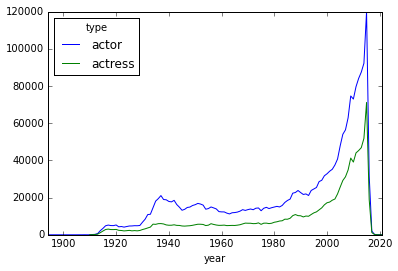

In [42]:
c = cast
g = c.groupby(['year', 'type']).size()
g.unstack('type').plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

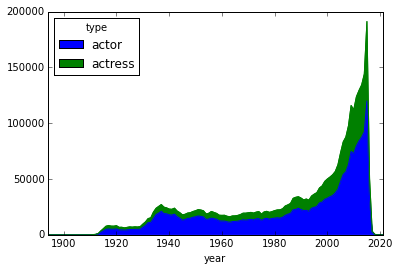

In [63]:
c = cast
g = c.groupby(['year', 'type']).size()
g.unstack('type').plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

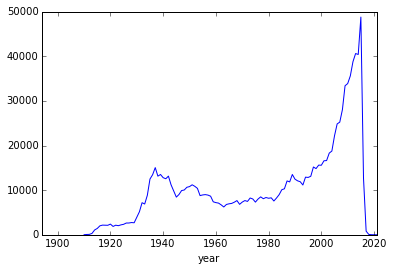

In [58]:
c = cast
g = c.groupby(['year', 'type']).size()
g = g.unstack('type')#.fillna(0)
(g.actor - g.actress).plot()


### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

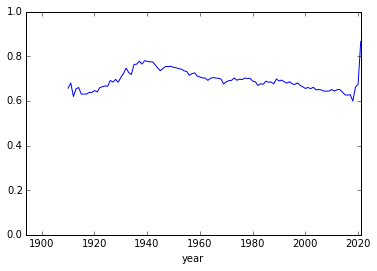

In [60]:
(g.actor/(g.actor + g.actress)).plot(ylim=[0, 1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

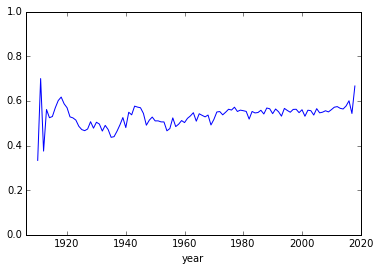

In [61]:
c = cast[cast.n == 2]
g = c.groupby(['year', 'type']).size()
g = g.unstack('type')#.fillna(0)
(g.actor/(g.actor + g.actress)).plot(ylim=[0, 1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

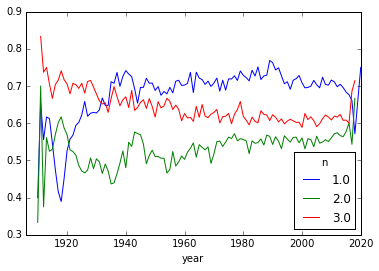

In [87]:
c = cast[cast.n < 4]
g = c.groupby(['n', 'year', 'type']).size()
g = g.unstack('type')
r = g.actor / (g.actor + g.actress)
r.unstack('n').plot()